# **Teste de Kolmogorov-Smirnov**



Verificar se os dados amostrais são provenientes de uma
distribuição específica e conhecida.

## Contexto

Testar se as alturas do time do Real Madrid seguem uma distribuição especificada através do testde de Smirnov Kolmogorov

In [ ]:
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("readxl")

dados <- read_excel("Idade_RealMadrid.xlsx", sheet='Planilha1')
head(dados)

Jogador,Idade
<chr>,<dbl>
Dani Carvaral,32
Éder Militão3,26
David Alaba4,32
Jesús Vallejo18,27
Fran García20,25
Antonio Rüdiger22,31


## Definição das Hipóteses

Dado um nível de significância $ \alpha = 0,05 = 5\text{%} $ queremos testar:

$$
H_0: \text{ As idades dos jogadores seguem um distribuição normal com média }μ = 25 \text{ e variância }σ^2 = 4
$$
$$
H_1: \text{ As idades dos jogadores não seguem um distribuição normal com média }μ = 25 \text{ e variância }σ^2 = 4
$$

## Aplicação do teste

[1] 32 26 32 27 25 31 29 19 21 21 26 39 24 19 33 28 25 19 24 25 23 18

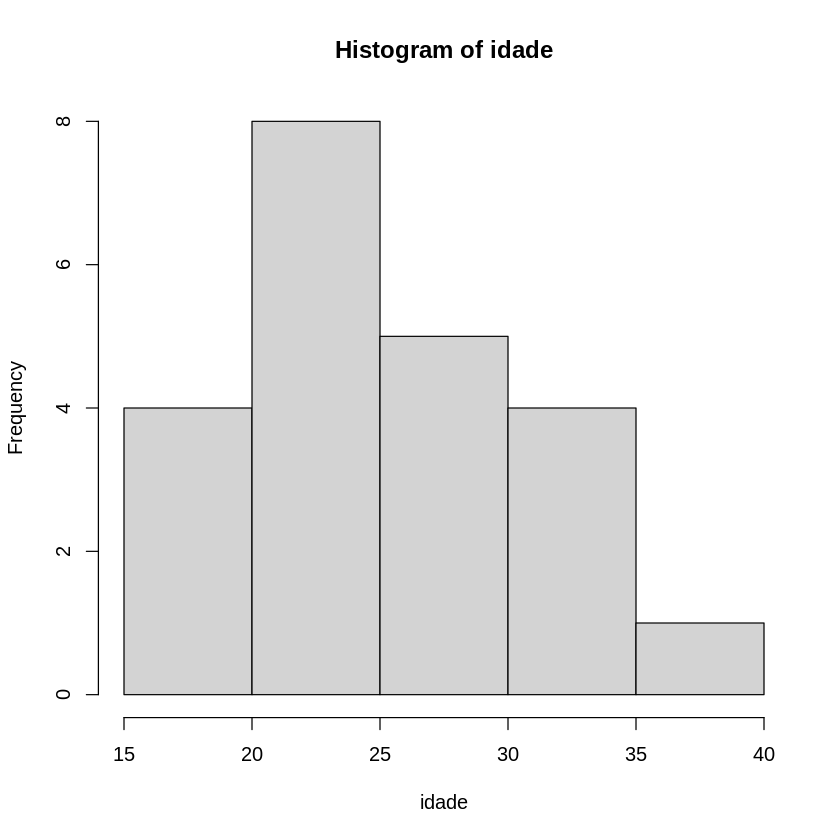

In [ ]:
idade <- as.vector(dados$Idade)
hist(idade)
idade

Aplicando o teste KS:

In [ ]:
ks.test(idade,"pnorm",mean = 25,sd = 2)

Warning message in ks.test.default(idade, "pnorm", mean = 25, sd = 2):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  idade
D = 0.25137, p-value = 0.124
alternative hypothesis: two-sided


## Decisão

Dado $ α = 0.05 = 5% $, o teste retornou um $p-valor = 0,127$, portanto  $valor-p > α$. Assim sendo, temos evidências fortes atrevés do Teste de Kolmogorov-Smirnov para não rejeitarmos H0.

## Conclusão

Dado $α = 5%$ os dados nos dão evidências suficientes de que a idades dos jogadores da equipe Real Madrid seguem uma distribuição normal com $μ=25$ e $σ^2 = 4$.

# **Teste Qui-Quadrado $(𝓧^2)$ de Aderência**

Testar a adequabilidade de um modelo probabilístico a um conjunto de
dados observado.

## Contexto

Verificar a adequabilidade da frequência de gols do atleta Lionel Messi de 2005 a 2022 através do Teste Qui-Quadrado de adrência.

In [2]:
library("readxl")

dados <- read_excel("GolsMessi.xlsx", sheet='Planilha1')
head(dados)

Temporada,Clube,Gols
<chr>,<chr>,<dbl>
2021/22,Paris SG,34
2020/21,Barcelona,47
2019/20,Barcelona,44
2018/19,Barcelona,50
2017/18,Barcelona,54
2016/17,Barcelona,52


## Definição das Hipóteses ($Poisson(50)$)

Dado um nível de significância $ \alpha = 0,01 = 1\text{%} $ queremos testar:

$$
H_0: \text{A frequência de gols/temporado do atleta Lionel Messi segue uma distribuição de Poisson com }λ=50
$$
$$
H_1: \text{A frequência de gols/temporado do atleta Lionel Messi não segue uma distribuição de Poisson com }λ=50
$$

## Aplicação do teste

[1] 34 47 44 50 54 52 49 57 46 50 60 55 53 51 40 36 25

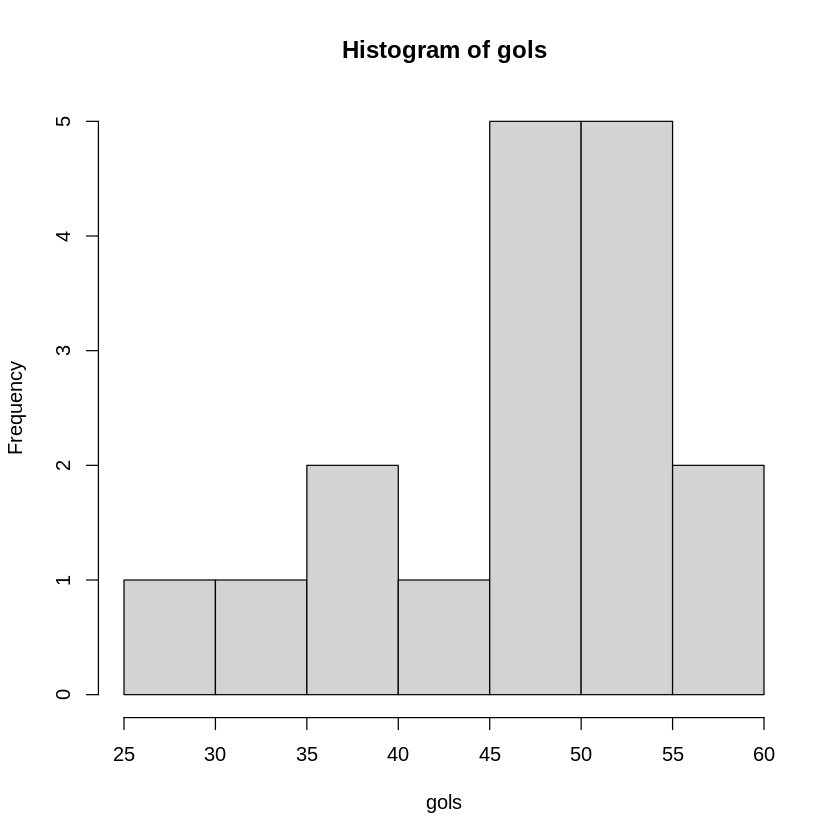

In [29]:
gols <- as.vector(dados$Gols)
hist(gols)
gols

Aplicando o teste Qui-Quadrado de Aderência:

In [30]:
lambda <- 50
min_gols <- min(gols)
max_gols <- max(gols)

freq_obs <- table(gols)

valores_gols <- min_gols:max_gols

freq_esperadas <- dpois(valores_gols, lambda) * length(gols)

freq_obs_completa <- as.numeric(table(factor(gols, levels = valores_gols)))

chisq_result <- chisq.test(x = freq_obs_completa, p = freq_esperadas, rescale.p = TRUE)

print(chisq_result)

Warning message in chisq.test(x = freq_obs_completa, p = freq_esperadas, rescale.p = TRUE):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  freq_obs_completa
X-squared = 1498.1, df = 35, p-value < 2.2e-16



## Conclusão
O teste retornou um $p-valor < α = 0,01 = 1\text{%}$, assim, segue que as frequências de gols do Lionel Messi durante as temporadas consideradas não podem ser adequadas num modelo de Poisson com $λ=50$.

Assim, testaremos outras hipóteses:

## Hipóteses (Normal(45,2))

$$
H_0: \text{A frequência de gols/temporado do atleta Lionel Messi segue uma distribuição de Poisson com }λ=50
$$
$$
H_1: \text{A frequência de gols/temporado do atleta Lionel Messi não segue uma distribuição de Poisson com }λ=50
$$

## Aplicação do teste

Aplicando o teste para a distribuição Normal com $μ=50$ e $σ^2=4$.

In [36]:
media <-
desvio_padrao <- 6

min_gols <- min(gols)
max_gols <- max(gols)

freq_obs <- table(gols)

valores_gols <- min_gols:max_gols

freq_esperadas <- dnorm(valores_gols, mean = media, sd = desvio_padrao) * length(gols)

freq_obs_completa <- as.numeric(table(factor(gols, levels = valores_gols)))

chisq_result <- chisq.test(x = freq_obs_completa, p = freq_esperadas, rescale.p = TRUE)

print(chisq_result)

Warning message in chisq.test(x = freq_obs_completa, p = freq_esperadas, rescale.p = TRUE):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  freq_obs_completa
X-squared = 222358, df = 35, p-value < 2.2e-16



## Conclusão
As frequências de gols do atleta Messia também não pôde ser modelo pela distribuição Normal, uma vez que $p - valor < \mu = 1\text{%}$.

Testemos outras hióteses:

## Hipóteses

$$
H_0: \text{A frequência de gols/temporado do atleta Lionel Messi segue uma distribuição de Gamma}
$$
$$
H_1: \text{A frequência de gols/temporado do atleta Lionel Messi não segue uma distribuição de Gamma}
$$

In [41]:
if (!require(MASS)) install.packages("MASS")
library(MASS)

# Ajustar a distribuição Gamma aos dados
# Como a Gamma é contínua, fazemos o ajuste diretamente aos dados de contagem
ajuste_gamma <- fitdistr(gols, "gamma")

# Parâmetros da distribuição Gamma
shape <- ajuste_gamma$estimate['shape']
rate <- ajuste_gamma$estimate['rate']

min_gols <- min(gols)
max_gols <- max(gols)
valores_gols <- min_gols:max_gols

freq_esperadas <- dgamma(valores_gols, shape = shape, rate = rate) * length(gols)

freq_obs_completa <- as.numeric(table(factor(gols, levels = valores_gols)))

chisq_result <- chisq.test(x = freq_obs_completa, p = freq_esperadas, rescale.p = TRUE)

print(chisq_result)

Warning message in chisq.test(x = freq_obs_completa, p = freq_esperadas, rescale.p = TRUE):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  freq_obs_completa
X-squared = 52.558, df = 35, p-value = 0.02864



In [42]:
ajuste_gamma

     shape       rate   
  24.187392    0.512062 
 ( 8.238977) ( 0.176242)

## Decisão e Conclusão
Dado que $p-valor = 0,027$, sob $H_0$ e com $α = 0,01$, não rejeitamos a hipótese nula.

Portanto,

Com $\alpha = 1\text{%}$ as frequências de gols do atleta Lionel Messi durante as temporadas consideradas nos dão evidências suficientes de que podem ser adequadas à distribuição Gamma com o parâmetro de $\text{forma = 24,19}$ e $\text{taxa = 0,51}$.